<a href="https://colab.research.google.com/github/SruthiPuli/SruthiPuli-Image-Classification-of-CIFAR-10-Dataset-using-Deep-Learning/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Data Preparation

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
])

transform_PIL_image = transforms.Compose([
    transforms.ToPILImage(),
])


In [ ]:
# Dataset Download

train_set = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform_train)
test_set = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform_test)

# DataLoader

train_loader = DataLoader(train_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(test_set, batch_size = 128, shuffle = False, num_workers = 2)

In [ ]:
# output classes

print(f'Output Classes are : f{train_set.classes}')

Output Classes are : f['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Download Trainset to view the images

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Class Images


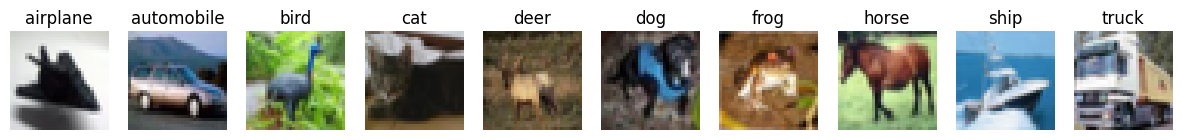

In [ ]:
# Output images

print('Class Images')

fig, axes = plt.subplots(1, 10)
fig.set_size_inches(15, 3)


for i in range(10) :
    for image, label in dataset :
        if(label == i) :
            axes[i].imshow(transform_PIL_image(image))
            axes[i].axis('off')
            axes[i].set_title(dataset.classes[i])
            break

plt.show()


In [ ]:
# CNN Model

class CIFAR10_CNN(nn.Module) :

    def __init__(self) :

        super().__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = (3, 3), padding = 1)
        self.norm1 = nn.BatchNorm2d(num_features = 64)

        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), padding = 1)
        self.norm2 = nn.BatchNorm2d(num_features = 128)

        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 3), padding = 1)
        self.norm3 = nn.BatchNorm2d(num_features = 256)

        self.conv4 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = (3, 3), padding = 1)
        self.norm4 = nn.BatchNorm2d(num_features = 512)

        self.pool = nn.MaxPool2d(kernel_size = (2, 2))
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features = 512 * 8 * 8, out_features = 1024)
        self.fc_norm1 = nn.BatchNorm1d(num_features = 1024)

        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        self.fc_norm2 = nn.BatchNorm1d(num_features = 256)
        self.fc3 = nn.Linear(in_features = 256, out_features = 10)

        self.relu = nn.ReLU()
        self.leaky = nn.LeakyReLU()
        self.drop = nn.Dropout(0.5)


    def forward(self, x) :

        x = self.relu(self.norm1(self.conv1(x)))
        x = self.relu(self.norm2(self.conv2(x)))
        x = self.pool(x)

        x = self.relu(self.norm3(self.conv3(x)))
        x = self.relu(self.norm4(self.conv4(x)))
        x = self.pool(x)

        x = self.flatten(x)

        x = self.leaky(self.fc_norm1(self.fc1(x)))
        x = self.drop(x)
        x = self.leaky(self.fc_norm2(self.fc2(x)))

        x = self.fc3(x)

        return x




In [ ]:
# device type

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device type is ', device)


Device type is  cuda


In [ ]:
# Model Instance

cifar10_model = CIFAR10_CNN()
cifar10_model.to(device)


CIFAR10_CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc_norm1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2

In [ ]:
# Loss and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cifar10_model.parameters(), lr = 0.001, weight_decay = 1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 20, gamma = 0.5)

In [ ]:
# Model Training

Epochs = 150

for epoch in range(Epochs) :

    cifar10_model.train()

    running_loss = 0.0

    for images, labels in train_loader :

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = cifar10_model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()

    cifar10_model.eval()

    correct , total = 0, 0

    with torch.no_grad() :

        for images, labels in test_loader :

            images, labels = images.to(device) , labels.to(device)

            outputs = cifar10_model(images)

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)

            correct += (predicted == labels).sum().item()


    accuracy = 100 * correct / total

    print(f'Epoch [{epoch+1} / {Epochs}], Loss : {running_loss/len(train_loader):.4f}, Test Accuracy : {accuracy:.2f}%')

print('Model training is Completed')



Epoch [1 / 150], Loss : 1.3588, Test Accuracy : 64.24%
Epoch [2 / 150], Loss : 1.0143, Test Accuracy : 65.22%
Epoch [3 / 150], Loss : 0.8945, Test Accuracy : 73.69%
Epoch [4 / 150], Loss : 0.8237, Test Accuracy : 74.34%
Epoch [5 / 150], Loss : 0.7706, Test Accuracy : 77.23%
Epoch [6 / 150], Loss : 0.7281, Test Accuracy : 78.38%
Epoch [7 / 150], Loss : 0.6899, Test Accuracy : 78.24%
Epoch [8 / 150], Loss : 0.6613, Test Accuracy : 81.64%
Epoch [9 / 150], Loss : 0.6281, Test Accuracy : 79.90%
Epoch [10 / 150], Loss : 0.5995, Test Accuracy : 81.06%
Epoch [11 / 150], Loss : 0.5750, Test Accuracy : 82.86%
Epoch [12 / 150], Loss : 0.5584, Test Accuracy : 84.99%
Epoch [13 / 150], Loss : 0.5283, Test Accuracy : 83.82%
Epoch [14 / 150], Loss : 0.5150, Test Accuracy : 83.58%
Epoch [15 / 150], Loss : 0.4951, Test Accuracy : 85.78%
Epoch [16 / 150], Loss : 0.4836, Test Accuracy : 85.97%
Epoch [17 / 150], Loss : 0.4676, Test Accuracy : 84.40%
Epoch [18 / 150], Loss : 0.4513, Test Accuracy : 86.89%
E

In [ ]:
# Model Evaluation

cifar10_model.eval()

correct , total = 0, 0

with torch.no_grad() :

    for images, labels in test_loader :

        images, labels = images.to(device) , labels.to(device)

        outputs = cifar10_model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()


accuracy = 100 * correct / total

print(f'Test Accuracy : {accuracy:.2f}%')

Test Accuracy : 91.94%


In [ ]:
# Saving the model

torch.save(cifar10_model.state_dict(), 'cifar10_cnn_model.pth')

In [ ]:
# Download the model into System

from google.colab import files

files.download('cifar10_cnn_model.pth')

print('Download Completed')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download Completed
